NAME : A S NAVEENA

TITLE OF WORK : DETECTING MOTORBIKE RIDERS WITH AND WITHOUT HELMET USING YOLOV2 ARCHITECTURE

# INSTALLING DARKNET

In [ ]:
!git clone https://github.com/pjreddie/darknet.git /content/drive/MyDrive/yolo

Cloning into '/content/drive/MyDrive/yolo'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.36 MiB | 6.69 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.
Checking out files: 100% (979/979), done.


In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!make

nvcc  -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -DCUDNN  --compiler-options "-Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -DCUDNN" -c ./src/convolutional_kernels.cu -o obj/convolutional_kernels.o
nvcc fatal   : Unsupported gpu architecture 'compute_30'
Makefile:92: recipe for target 'obj/convolutional_kernels.o' failed
make: *** [obj/convolutional_kernels.o] Error 1


In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2021-11-15 17:21:09--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  39.1MB/s    in 5.1s    

2021-11-15 17:21:14 (38.1 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
!./darknet detect /content/drive/MyDrive/yolo/cfg/yolov2.cfg yolov2.weights /content/drive/MyDrive/yolo/test_img.jfif

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 max          2 x 2 / 2   608 x 608 x  32   ->   304 x 304 x  32
    2 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    3 max          2 x 2 / 2   304 x 304 x  64   ->   152 x 152 x  64
    4 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    5 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    6 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    7 max          2 x 2 / 2   152 x 152 x 128   ->    76 x  76 x 128
    8 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
    9 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   10 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   11 max          2 x 2 / 2    76 x  76 x 256   ->

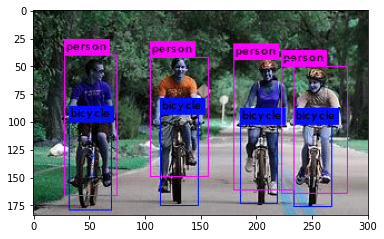

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/darknet/predictions.jpg")
plt.imshow(img)

# TRAINING YOLO WITH CUSTOM DATA ON DARKNET

In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!python Labelled/creating-files-data-and-name.py

In [ ]:
!python Labelled/creating-train-and-test-txt-files.py

In [ ]:
# train test split

import glob, os

current_dir = 'Labelled'
percentage_test = 10
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    if counter == index_test:
        counter = 1
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1

In [ ]:
!chmod +x ./darknet

#ATTEMPT 1 : YOLOV2

In [ ]:
# training the model with custom data to detect helmetted and non helmetted motorbike riders
!./darknet detector train Labelled/liter_saveabelled_data.data cfg/yolov2_custom.cfg Custom_Weights/darknet19_448.conv.23

In [ ]:
# testing the model with an image
!./darknet detector test Labelled/labelled_data.data cfg/yolov2_custom.cfg backup/yolov2_custom_900.weights test_img.jfif

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

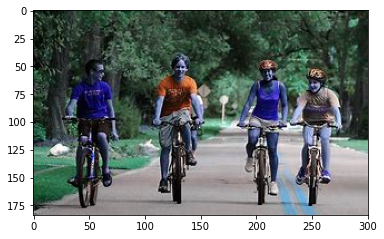

In [ ]:
img = cv2.imread("test_img.jfif")
plt.imshow(img)

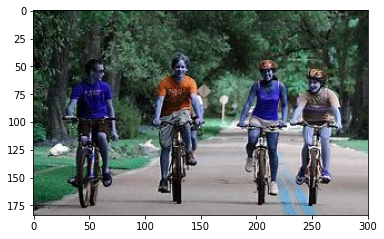

In [ ]:
img = cv2.imread("predictions.jpg")
plt.imshow(img)

# ATTEMPT 2 : TINY-YOLO

In [ ]:
# training the model with custom data to detect helmetted and non helmetted motorbike riders
!./darknet detector train Labelled/labelled_data.data cfg/yolov2-tiny_custom.cfg Custom_Weights/darknet19_448.conv.23

In [ ]:
# testing the model with an image
!./darknet detector test Labelled/labelled_data.data cfg/yolov2-tiny_custom.cfg backup/yolov2-tiny_custom_800.weights data/BikesHelmets327.png

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

In [ ]:
import cv2
import matplotlib.pyplot as plt

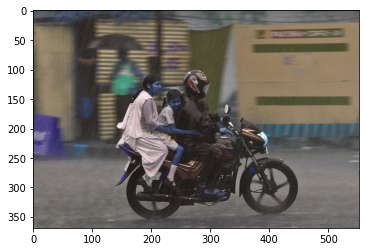

In [ ]:
img = cv2.imread("data/BikesHelmets327.png")
plt.imshow(img)

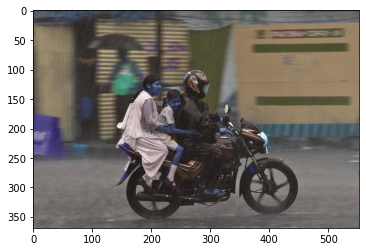

In [ ]:
img = cv2.imread("predictions.jpg")
plt.imshow(img)

# YOLO USING DARKFLOW

In [ ]:
!git clone https://github.com/thtrieu/darkflow.git /content/drive/MyDrive/darkflow

Cloning into '/content/drive/MyDrive/darkflow'...
remote: Enumerating objects: 2713, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2709
Receiving objects: 100% (2713/2713), 32.98 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (1761/1761), done.


In [ ]:
%cd /content/drive/MyDrive/darkflow

/content/drive/MyDrive/darkflow


In [ ]:
!pip install .

In [ ]:
!pip install tf-slim

In [ ]:
!pip install --force-reinstall tf-slim

In [ ]:
!apt-get install python3.7

In [ ]:
!python3.7 -m pip install tensorflow-gpu==1.15.0

In [ ]:
!cp -R /content/drive/MyDrive/darkflow/darkflow/cython_utils /content/drive/MyDrive/darkflow

In [ ]:
%cd /content/drive/MyDrive/darkflow

/content/drive/MyDrive/darkflow


In [ ]:
 !python3.7 setup.py build_ext --inplace

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [ ]:
!pwd

/content/drive/My Drive/darkflow


In [ ]:
%cd /content/drive/MyDrive/darkflow
!mkdir bin

/content/drive/MyDrive/darkflow


In [ ]:
%cd bin

/content/drive/MyDrive/darkflow/bin


In [ ]:
!wget https://pjreddie.com/media/files/yolov2-voc.weights

In [ ]:
!cp /content/drive/MyDrive/yolo/yolov2.weights /content/darkflow/bin/

In [ ]:
!cp /content/drive/MyDrive/yolo/yolo.weights /content/drive/MyDrive/darkflow/bin

In [ ]:
%cd /content/drive/MyDrive/darkflow

/content/drive/MyDrive/darkflow


In [ ]:
options = {"model": "cfg/yolo_custom.cfg", 
           "load": "bin/yolo.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/drive/MyDrive/yolo/image_data/annotations_xml/",
           "dataset": "/content/drive/MyDrive/yolo/image_data/images/"}

In [ ]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo_custom.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.08846282958984375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 

In [ ]:
tfnet.train()

In [ ]:
# loading from the latest checkpoint

load_options = {"model": "cfg/yolo_custom.cfg",
                "load": -1,
                "gpu": 1.0}

In [ ]:
tfnet2 = TFNet(load_options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.002033233642578125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 

In [ ]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_custom-600
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom-600


PREDICTION ON SOME UNSEEN TEST DATA IMAGES

In [ ]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + "-" + str(round(confidence, 3))
        
        if confidence > 0.2:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 1, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

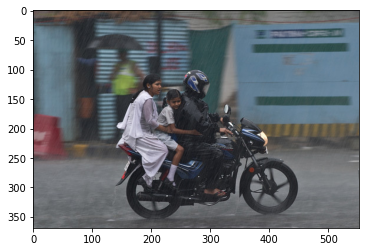

In [ ]:
img = cv2.imread("/content/drive/MyDrive/yolo/data/BikesHelmets327.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
results = tfnet2.return_predict(img)
print(results)

[{'label': '1', 'confidence': 0.0, 'topleft': {'x': 243, 'y': 86}, 'bottomright': {'x': 309, 'y': 208}}, {'label': '1', 'confidence': 0.0, 'topleft': {'x': 161, 'y': 93}, 'bottomright': {'x': 219, 'y': 237}}, {'label': '1', 'confidence': 0.0, 'topleft': {'x': 227, 'y': 123}, 'bottomright': {'x': 270, 'y': 209}}, {'label': '1', 'confidence': 0.0, 'topleft': {'x': 219, 'y': 100}, 'bottomright': {'x': 277, 'y': 232}}, {'label': '1', 'confidence': 0.0, 'topleft': {'x': 255, 'y': 121}, 'bottomright': {'x': 298, 'y': 210}}, {'label': '1', 'confidence': 0.24924272, 'topleft': {'x': 247, 'y': 104}, 'bottomright': {'x': 308, 'y': 227}}, {'label': '1', 'confidence': 0.10077242, 'topleft': {'x': 220, 'y': 68}, 'bottomright': {'x': 333, 'y': 264}}, {'label': '1', 'confidence': 0.10380944, 'topleft': {'x': 271, 'y': 97}, 'bottomright': {'x': 337, 'y': 232}}, {'label': '1', 'confidence': 0.17559274, 'topleft': {'x': 163, 'y': 97}, 'bottomright': {'x': 218, 'y': 269}}, {'label': '1', 'confidence': 0.

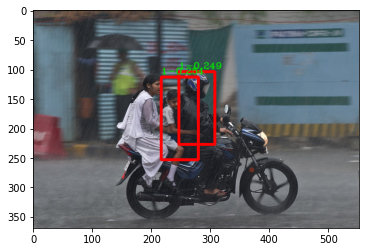

In [ ]:
plt.imshow(boxing(img, results))

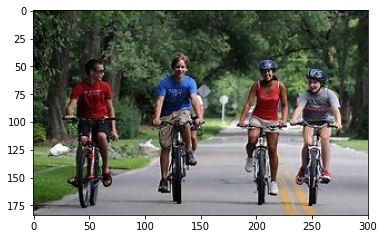

In [ ]:
img = cv2.imread("/content/drive/MyDrive/yolo/test_img.jfif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

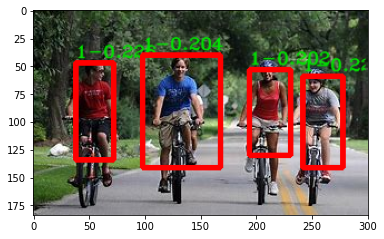

In [ ]:
results = tfnet2.return_predict(img)
plt.imshow(boxing(img, results))

PREDICTION ON SOME UNSEEN TEST DATA VIDEOS

In [ ]:
%cd /content/drive/MyDrive/darkflow

/content/drive/MyDrive/darkflow


In [ ]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + "-" + str(round(confidence, 3))
        
        if confidence > 0.2:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 3, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv2.VideoCapture('./sample_data/WithoutHelmet.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_data/WithoutHelmet_outputnew.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        new_frame = boxing(frame, results)
        # Display the resulting frame
        out.write(new_frame)
        #cv2_imshow(new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('./sample_data/WithoutHelmet.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_data/WithoutHelmet_output.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        new_frame = boxing(frame, results)
        # Display the resulting frame
        out.write(new_frame)
        cv2_imshow(new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture('./sample_data/test.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_data/test_output.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        new_frame = boxing(frame, results)
        # Display the resulting frame
        out.write(new_frame)
        cv2_imshow(new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()